In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IDEA + QUESTIONS

PCA and test the new X

# DATA ANALYSIS

In [3]:
df = pd.read_csv("4s_data.csv")

Attached is a csv file with the data we can use to begin with. The rows represent the samples while the features are in the columns. The last column ('sat1_col') is the response variable, i.e., the collapse capacity for each ground motion. There are 88 ground motions, i.e., 88 rows, in this data set.

Here are a few notes related to the predictive features:

- the columns called by numbers (e.g., 0.42) represent the spectral accelerations at the specified period -- for instance, column 0.42 indicates Sa(T = 0.42s), i.e., the spectral acceleration at period T = 0.42s. The units for Sa(T) are in 'g'. 

- 'sa_avg' feature corresponds to average spectral acceleration, where averaging was performed over some favorable range of periods (I can provide more details, but currently this is not important)

- features 'da5_75' and 'da5_95' are significant durations of the ground motion, unit is second

- 'fiv3' is the so-called filtered incremental velocity, unit cm/s

- the 'fiv3_sa_avg' (unit: second) and 'sa_ratio' (no unit) are two additional useful features

These predictive features are currently the state-of-the art in terms of describing the ground motion waveform using a set of scalars. People have been studying ground motion properties extensively and as a result we can distill this into these features which should have you in good shape for the project. These scalars are generally called ground motion intensity measures (IMs).

As discussed, the objective is to develop a regression-based data-driven surrogate that maps the predictive features onto 'sat1_col'. In other words, given a ground motion described by IMs, the model should output the corresponding collapse capacity. In terms of first steps, I suggest the following:
1) look at the data and try plotting the spectra, see the range of ground motion intensities that are present
2) look at the data* and try observing if there are some patterns that emerge --- basically, doing exploratory data analysis
3) try developing a simple surrogate model as a baseline -- feel free to split the provided data into train/validation and test sets as you like
4) given the baseline surrogate, look into feature importance -- which of these features seem to be most important?
5) see how this goes and ask any questions

We can plan to meet next week once you have some experience with this dataset. Just a few more comments what we'll do down the line -- we will have to discuss how to potentially "massage" this dataset to get more points for regression (basically data engineering); I will also provide you with a separate "test" dataset which you will be able to use to see how your surrogate does.

Let me know if there are any questions and have fun doing the project! I am looking forward to your results.


Collapse capacity = lowest intensity at which the groud motion induces collapse

Sa_ratio = Sa(T1)/Sa,avg -> independent of scaling

da_5_75 -> duration when the gm release 75% of energy (idnependant fo scaling)
fiv -> linear dependent of the scaling

When the building is damage, T increase

Fiv ratio = Fiv/Sa_avg, Fiv add the information of the time (Sa don't)

only sa ,sa_avg and fiv 3 scale linearly

In [4]:
df

,Unnamed: 0,0.42,0.48,0.54,0.6,0.66,0.72,0.78,0.84,0.9,...,6.18,6.24,6.3,sa_avg,da5_75,da5_95,fiv3,fiv3_sa_avg,sa_ratio,sat1_col
0,0,0.575990,0.634012,0.984589,0.651638,0.552142,0.513674,0.648066,0.871627,0.826833,...,0.012103,0.011779,0.011465,0.069200,6.080,9.220,72.137797,1.062640,1.853447,0.932767
1,1,0.896211,1.304416,1.543180,1.113115,0.689017,0.550542,0.588670,0.768486,0.768595,...,0.008579,0.008367,0.008163,0.060232,4.970,8.390,67.461330,1.141723,1.758348,0.760412
2,2,1.082617,0.968053,1.000421,0.910550,0.576288,0.552972,0.563723,0.494189,0.540344,...,0.032789,0.032189,0.031584,0.097871,2.620,8.520,79.997347,0.833204,1.655255,0.875986
3,3,0.849378,0.859986,0.755665,0.743255,0.749674,0.804410,0.839647,0.864842,0.846432,...,0.012952,0.012546,0.012152,0.068796,1.480,9.350,74.235966,1.099966,2.459418,0.662390
4,4,0.367455,0.443266,0.451825,0.409128,0.356187,0.328962,0.361279,0.344421,0.317798,...,0.039085,0.038664,0.038225,0.084427,6.360,11.660,73.982543,0.893261,1.301475,1.025093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,0.781084,0.761288,1.052943,0.954739,1.122963,0.950573,0.898066,0.761042,0.689891,...,0.036275,0.035084,0.033112,0.110600,68.790,112.520,82.034242,0.756089,1.460307,0.387620
84,84,0.981351,0.955204,0.827847,0.536066,0.693835,0.587537,0.704240,0.625330,0.588425,...,0.086046,0.079670,0.073873,0.202654,70.150,107.840,151.028729,0.759690,1.696002,0.367451
85,85,0.595830,0.726171,0.573850,0.520347,0.489539,0.440949,0.428664,0.553211,0.503269,...,0.029629,0.028638,0.027619,0.104806,71.210,110.070,84.456690,0.821444,2.473173,0.514672
86,86,0.394897,0.461244,0.533049,0.505265,0.684984,0.708273,0.515718,0.443249,0.556150,...,0.016659,0.016326,0.015987,0.086041,71.740,115.000,87.346939,1.034835,1.312010,0.277765


In [5]:
df.describe()

,Unnamed: 0,0.42,0.48,0.54,0.6,0.66,0.72,0.78,0.84,0.9,...,6.18,6.24,6.3,sa_avg,da5_75,da5_95,fiv3,fiv3_sa_avg,sa_ratio,sat1_col
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,43.500000,0.826939,0.837223,0.780261,0.684447,0.637141,0.576727,0.513150,0.478383,0.446296,...,0.036073,0.035286,0.034447,0.100081,26.678938,46.458369,87.199106,0.913954,1.691884,0.651662
std,25.547342,0.404350,0.401102,0.357229,0.312683,0.289906,0.268392,0.225832,0.203083,0.201908,...,0.026987,0.026052,0.025137,0.047571,23.245931,37.836278,36.906120,0.139975,0.529678,0.314334
min,0.000000,0.181245,0.185230,0.183211,0.155516,0.156000,0.122157,0.162853,0.131779,0.122953,...,0.004225,0.004127,0.004021,0.030615,1.480000,4.245000,31.875717,0.663058,0.691920,0.249976
25%,21.750000,0.545493,0.555388,0.539036,0.463549,0.429176,0.401294,0.364926,0.356542,0.329576,...,0.017762,0.017732,0.017640,0.071955,5.446250,11.131250,64.047735,0.821124,1.302245,0.417535
50%,43.500000,0.774271,0.756159,0.747235,0.630910,0.576958,0.516926,0.471563,0.434331,0.387480,...,0.030723,0.030222,0.029694,0.091593,24.725000,41.855000,81.547352,0.881326,1.638872,0.552000
75%,65.250000,1.059555,1.012035,0.951564,0.881648,0.824112,0.698914,0.626988,0.584661,0.538721,...,0.045774,0.045413,0.044367,0.112455,44.682500,79.847500,102.007062,0.993240,2.021846,0.763462
max,87.000000,2.116090,2.286552,2.200035,1.648121,1.486997,1.499605,1.407840,1.175371,1.230931,...,0.148577,0.140693,0.132591,0.355175,78.750000,146.830000,259.798128,1.328251,3.196423,1.863443


In [6]:
df_numpy = df.to_numpy()
dfhead_numpy = df.columns.to_numpy()

In [7]:
Period = dfhead_numpy[1:-7]
df_period = df[Period]
df_value = df[['sa_avg','da5_75','da5_95','fiv3','fiv3_sa_avg','sa_ratio','sat1_col']]
df_scaled_period= df_period.div(df_period['0.78'], axis=0)
df_scaled_numpy = pd.concat([df_scaled_period, df_value], axis=1).to_numpy()

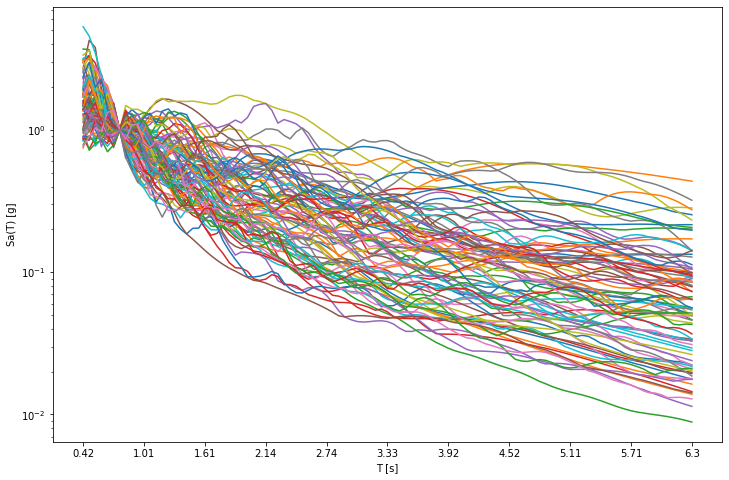

In [8]:
plt.figure(figsize=(12,8))
Period = dfhead_numpy[1:-7]
for i in range(len(df_scaled_period.to_numpy())):
    plt.plot(Period,df_scaled_period.to_numpy()[i])
plt.ylabel("Sa(T) [g]")
plt.yscale('log')
#plt.xscale("log")
plt.xlabel("T [s]")
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

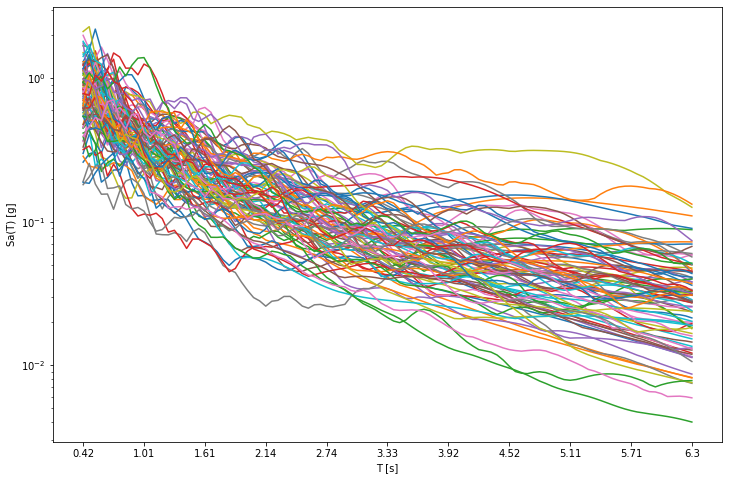

In [9]:
plt.figure(figsize=(12,8))
Period = dfhead_numpy[1:-7]
for i in range(len(df_numpy)):
    plt.plot(Period,df_numpy[i,1:-7])
plt.ylabel("Sa(T) [g]")
plt.yscale('log')
#plt.yscale("log")
plt.xlabel("T [s]")
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

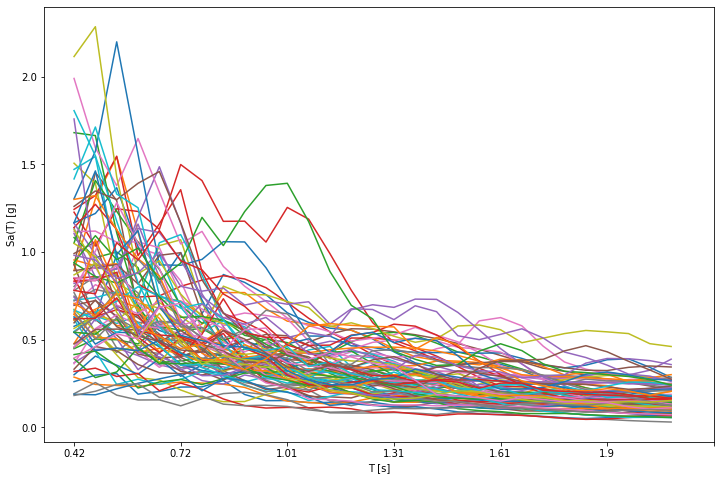

In [10]:
plt.figure(figsize=(12,8))
Period = dfhead_numpy[1:30]
for i in range(len(df_numpy)):
    plt.plot(Period,df_numpy[i,1:30])
plt.ylabel("Sa(T) [g]")
plt.xlabel("T [s]")
plt.xticks([0,5,10,15,20,25,30])
plt.show()

In [11]:
df['sa_avg']

0     0.069200
1     0.060232
2     0.097871
3     0.068796
4     0.084427
        ...   
83    0.110600
84    0.202654
85    0.104806
86    0.086041
87    0.094357
Name: sa_avg, Length: 88, dtype: float64

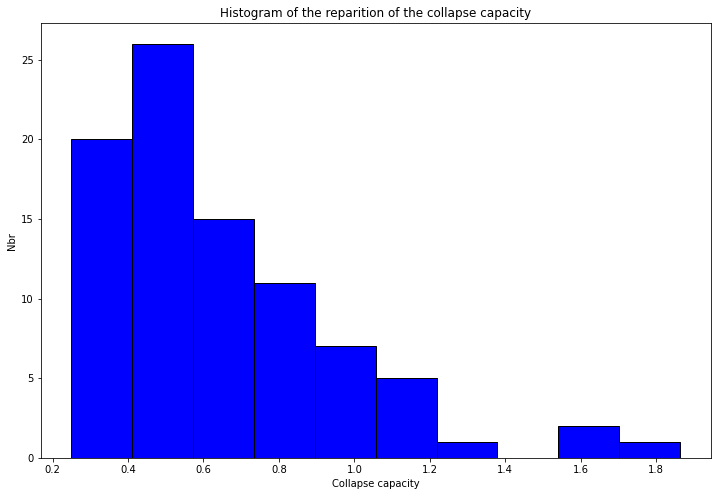

In [12]:
plt.figure(figsize=(12,8))
plt.hist(df['sat1_col'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Collapse capacity')
plt.ylabel('Nbr')
plt.title('Histogram of the reparition of the collapse capacity')
plt.show()

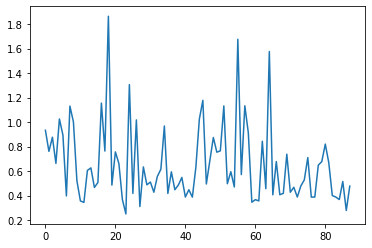

In [13]:
plt.plot(df['sat1_col'])

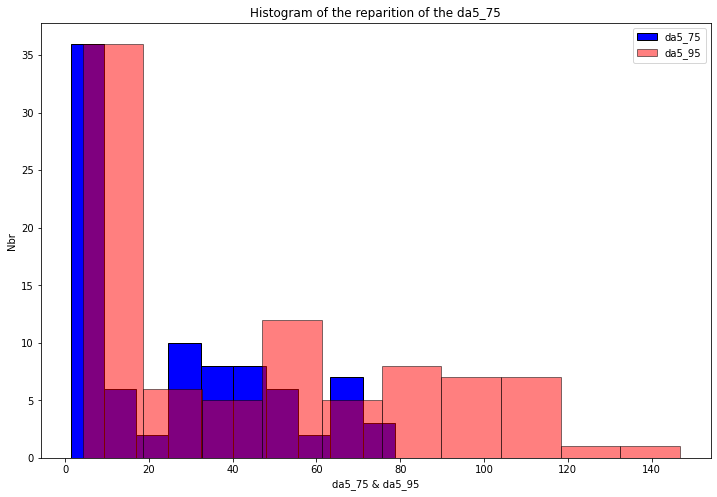

In [14]:
plt.figure(figsize=(12,8))
plt.hist(df['da5_75'], bins=10, color='blue', edgecolor='black',label="da5_75")
plt.hist(df['da5_95'], bins=10, color='red', edgecolor='black',alpha=0.5,label="da5_95")
plt.xlabel('da5_75 & da5_95')
plt.ylabel('Nbr')
plt.title('Histogram of the reparition of the da5_75')
plt.legend()
plt.show()

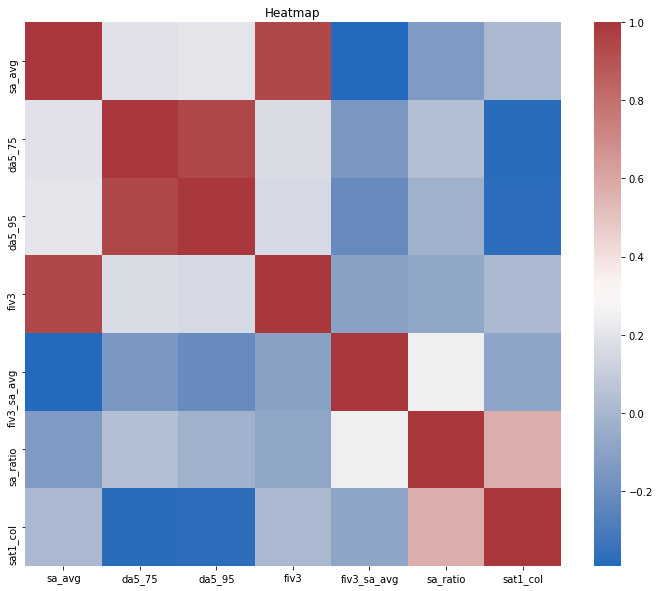

In [15]:
f, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(df[['sa_avg', 'da5_75', 'da5_95', 'fiv3',
                'fiv3_sa_avg', 'sa_ratio', 'sat1_col']].corr(), cmap='vlag')
plt.title('Heatmap')
plt.show()

 FIV3, which is based directly on features of the ground acceleration time history instead of peak responses of one or many linear elastic oscillators like Sa or Saavg.

Find T1 and try to scale in one point and then use PCA

# MODELS

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [45]:
#X = df_numpy[:,1:-1] #All data
#X = df_numpy[:,-7:] #All "resume" features
#X = df_numpy[:,1:-7] #All Sa
X = df_numpy[:,1:50] #First 50 Sa

#X = df_scaled_numpy[:,1:-1] #All data
#X = df_scaled_numpy[:,-7:] #All "resume" features
#X = df_scaled_numpy[:,1:-7] #All Sa
#X = df_scaled_numpy[:,1:50] #First 50 Sa

y = df_numpy[:,-1] #Collapse capacity

# SGD

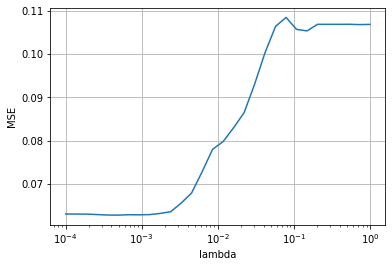

In [32]:
from sklearn.linear_model import SGDRegressor

max_iterations = 10

MSE = []
lambdas = np.logspace(-4, 0, 30)

for j in range(len(lambdas)):
    SEED = 42
    MSE_Train_SGD = np.zeros((1,max_iterations))
    MSE_Test_SGD = np.zeros((1,max_iterations))
    for i in range(max_iterations):

        np.random.seed(SEED)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

        sgd_reg = SGDRegressor(max_iter=100000000, tol=1e-3, learning_rate='adaptive', random_state=SEED, penalty="l1", alpha=lambdas[j])

        sgd_reg.fit(X_train, y_train)

        y_pred_train = sgd_reg.predict(X_train)
        y_pred_test = sgd_reg.predict(X_test)

        MSE_Train_SGD[0,i] = mean_squared_error(y_train, y_pred_train)
        MSE_Test_SGD[0,i] = mean_squared_error(y_test, y_pred_test)

        SEED = SEED + 1
    
    MSE.append(np.mean(MSE_Test_SGD))
    
plt.plot(lambdas,MSE)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.xscale('log',base=10) 
plt.grid(True)
best_lambda = lambdas[MSE.index(min(MSE))]   

In [33]:
from sklearn.linear_model import SGDRegressor

max_iterations = 10
MSE_Train_SGD = np.zeros((1,max_iterations))
MSE_Test_SGD = np.zeros((1,max_iterations))


for i in range(max_iterations):
    
    np.random.seed(SEED)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

    sgd_reg = SGDRegressor(max_iter=10000000, tol=1e-3, learning_rate='adaptive', random_state=SEED, penalty="l1", alpha=best_lambda)

    sgd_reg.fit(X_train, y_train)
    
    y_pred_train = sgd_reg.predict(X_train)
    y_pred_test = sgd_reg.predict(X_test)
    
    MSE_Train_SGD[0,i] = mean_squared_error(y_train, y_pred_train)
    MSE_Test_SGD[0,i] = mean_squared_error(y_test, y_pred_test)
    
    SEED = SEED + 1
    
    

print(f"SGD Mean Squared Error train: {round(np.mean(MSE_Train_SGD),2)} ± {round(np.std(MSE_Train_SGD),2)}")
print(f"SGD Mean Squared Error test: {round(np.mean(MSE_Test_SGD),2)} ± {round(np.std(MSE_Test_SGD),2)}")
print('Relative error (%)')
print(abs(y_pred_test-y_test)/y_test*100)

SGD Mean Squared Error train: 0.04 ± 0.0
SGD Mean Squared Error test: 0.07 ± 0.01
Relative error (%)
[ 21.94795952  37.51494532   7.20368938  17.1497673  115.20683466
  26.62606682  11.19624089  33.2540496   40.4413206   50.13501225
  32.17563218 105.63747622  95.02762972  30.66047245 105.81330958
  29.30642976   8.85233699   9.4928042   78.60805142  26.40325895
  41.11527724  59.48312085  35.23791444   1.10989603  13.70243384
  30.67511147  62.63196822]


# Ridge regression

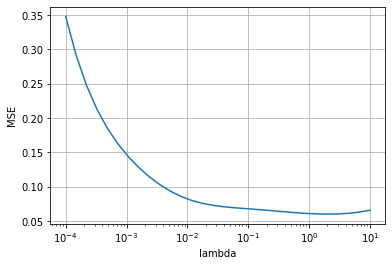

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
MSE = []
lambdas = np.logspace(-4, 1, 30)
max_iterations = 10
for j in range(len(lambdas)):
    
    MSE_Train_RIDGE = np.zeros((1,max_iterations))
    MSE_Test_RIDGE = np.zeros((1,max_iterations))
    SEED = 42
    for i in range(max_iterations):

        np.random.seed(SEED)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

        lin_reg = Ridge(alpha=lambdas[j])

        sgd_reg.fit(X_train, y_train)
        lin_reg.fit(X_train, y_train)

        y_pred_train = lin_reg.predict(X_train)
        y_pred_test = lin_reg.predict(X_test)

        MSE_Train_RIDGE[0,i] = mean_squared_error(y_train, y_pred_train)
        MSE_Test_RIDGE[0,i] = mean_squared_error(y_test, y_pred_test)

        SEED = SEED + 1
    
    MSE.append(np.mean(MSE_Test_RIDGE))
    
plt.plot(lambdas,MSE)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.xscale('log',base=10) 
plt.grid(True)
best_lambda = lambdas[MSE.index(min(MSE))]

In [35]:
MSE_Train_RIDGE = np.zeros((1,max_iterations))
MSE_Test_RIDGE = np.zeros((1,max_iterations))
SEED = 42
for i in range(max_iterations):

    np.random.seed(SEED)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

    lin_reg = Ridge(alpha=best_lambda)

    sgd_reg.fit(X_train, y_train)
    lin_reg.fit(X_train, y_train)

    y_pred_train = lin_reg.predict(X_train)
    y_pred_test = lin_reg.predict(X_test)

    MSE_Train_RIDGE[0,i] = mean_squared_error(y_train, y_pred_train)
    MSE_Test_RIDGE[0,i] = mean_squared_error(y_test, y_pred_test)

    SEED = SEED + 1

print(f"RIDGE Mean Squared Error train: {round(np.mean(MSE_Train_RIDGE),2)} ± {round(np.std(MSE_Train_RIDGE),2)}")

print(f"RIDGE Mean Squared Error test: {round(np.mean(MSE_Test_RIDGE),2)} ± {round(np.std(MSE_Test_RIDGE),2)}")       

print('Relative error (%)')
print(np.abs(y_pred_test - y_test) / y_test * 100)    

RIDGE Mean Squared Error train: 0.04 ± 0.0
RIDGE Mean Squared Error test: 0.06 ± 0.02
Relative error (%)
[ 36.53634245  57.0541398   37.84822283  26.54396344  23.04152627
   4.41561638  29.0733212   41.37552074  43.93852094  22.95920179
  33.34157895  53.32600238  21.08710667   3.01323364  42.51932764
  59.49971446  10.50594905   6.4686943    9.02676033  35.20310828
   7.75689553  25.95208866 133.78736241  55.0473514   46.67062092
  22.59542286  61.79346002]


# MLP

MLP Mean Squared Error train: 0.05 ± 0.01
MLP Mean Squared Error test: 0.09 ± 0.04
Relative error (%)
[33.584003  59.681847  38.97556   27.957191   1.1120086 18.69177
  6.542479  45.833874  67.88297   17.047129  38.48296   26.22799
 28.026985   2.995901  13.32897   23.609612   4.959792  22.004812 ]


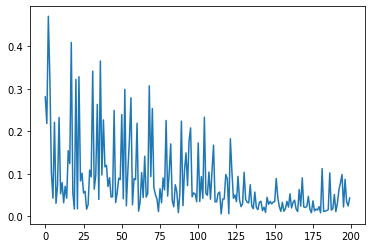

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

SEED = 42
max_iterations = 10
hidden_size = 64 
output_size = 1

MSE_Train_MLP = np.zeros((1,max_iterations))
MSE_Test_MLP = np.zeros((1,max_iterations))

for i in range(max_iterations):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
    
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train.reshape(-1, 1))  
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test.reshape(-1, 1))

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    input_size = X_train.shape[1]
    
    model = RegressionModel(input_size, hidden_size, output_size)

    # MSE and Adam
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    losses = []
    num_epochs = 200
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
    
        losses.append(loss.detach().numpy())
       
    # Testing
    with torch.no_grad():
        model.eval()
        y_pred_train = model(X_train_tensor)
        y_pred_test = model(X_test_tensor)
        MSE_Train_MLP[0,i] = mean_squared_error(y_train, y_pred_train)
        MSE_Test_MLP[0,i] = mean_squared_error(y_test, y_pred_test)
    SEED = SEED + 1 


print(f"MLP Mean Squared Error train: {round(np.mean(MSE_Train_MLP),2)} ± {round(np.std(MSE_Train_MLP),2)}")

print(f"MLP Mean Squared Error test: {round(np.mean(MSE_Test_MLP),2)} ± {round(np.std(MSE_Test_MLP),2)}")        

y_pred_np = y_pred_test.numpy().flatten()
y_test_np = y_test_tensor.numpy().flatten()

print('Relative error (%)')
print(np.abs(y_pred_np - y_test_np) / y_test_np * 100)

plt.plot(losses)

# KNN

In [37]:
# from sklearn.neighbors import KNeighborsRegressor

# from sklearn.linear_model import LinearRegression

# max_iterations = 10
# MSE_Train_KNN = np.zeros((1,max_iterations))
# MSE_Test_KNN = np.zeros((1,max_iterations))
# SEED = 42
# for i in range(max_iterations):
    
#     np.random.seed(SEED)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

#     knn_model = KNeighborsRegressor(n_neighbors=5)
#     knn_model.fit(X_train, y_train)
    
#     y_pred_train = knn_model.predict(X_train)
#     y_pred_test = knn_model.predict(X_test)
    
#     MSE_Train_KNN[0,i] = mean_squared_error(y_train, y_pred_train)
#     MSE_Test_KNN[0,i] = mean_squared_error(y_test, y_pred_test)
    
#     SEED = SEED + 1

# print(f"KNN Mean Squared Error train: {round(np.mean(MSE_Train_KNN),2)} ± {round(np.std(MSE_Train_KNN),2)}")

# print(f"KNN Mean Squared Error test: {round(np.mean(MSE_Test_KNN),2)} ± {round(np.std(MSE_Test_KNN),2)}")
# print('Relative error (%)')
# print(abs(y_pred_test-y_test)/y_test*100)

# Bayesian linear regression

In [38]:
from sklearn.linear_model import BayesianRidge

SEED = 42
max_iterations = 10
MSE_Train_BLR = np.zeros((1,max_iterations))
MSE_Test_BLR = np.zeros((1,max_iterations))

for i in range(max_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

    bayesian_model = BayesianRidge()

    bayesian_model.fit(X_train, y_train)

    y_pred_train = bayesian_model.predict(X_train)
    y_pred_test = bayesian_model.predict(X_test)

    MSE_Train_BLR[0,i] = mean_squared_error(y_train, y_pred_train)
    MSE_Test_BLR[0,i] = mean_squared_error(y_test, y_pred_test)
    
    SEED = SEED + 1

print(f"BLR Mean Squared Error train: {round(np.mean(MSE_Train_BLR),2)} ± {round(np.std(MSE_Train_BLR),2)}")

print(f"BLR Mean Squared Error test: {round(np.mean(MSE_Test_BLR),2)} ± {round(np.std(MSE_Test_BLR),2)}")

print('Relative error (%)')
print(abs(y_pred_test-y_test)/y_test*100)


BLR Mean Squared Error train: 0.04 ± 0.0
BLR Mean Squared Error test: 0.07 ± 0.02
Relative error (%)
[40.44038635 61.16412654 52.49782073 27.43019225 14.77112566  8.08589819
 20.80916431 43.72343728 43.47051045 16.87855249 36.09515931 46.8522944
 23.19073563  0.25600938 39.64179249 47.81863795 10.64575971  7.7259315 ]


# Gradient Boosting (XGBoost, LightGBM, CatBoost)

In [39]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import mean_squared_error

# # Générer des données fictives (remplacez cela par vos données réelles)
# np.random.seed(42)
# X = np.random.rand(100, 5)  # 100 exemples, 5 caractéristiques
# y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)  # Variable cible avec du bruit

# # Diviser les données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Définir les hyperparamètres à rechercher
# learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# n_estimators = [50, 100, 200, 300]
# max_depth = [3, 4, 5, 6]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]

# random_grid = {
#     'learning_rate': learning_rate,
#     'n_estimators': n_estimators,
#     'max_depth': max_depth,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf
# }

# # Créer le modèle GradientBoostingRegressor
# gb_model = GradientBoostingRegressor()

# # Créer l'objet GridSearchCV
# grid_search = GridSearchCV(estimator=gb_model, param_grid=random_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# # Adapter le modèle aux données d'entraînement
# grid_search.fit(X_train, y_train)

# # Afficher les meilleurs paramètres et le meilleur score
# print("Meilleurs paramètres:", grid_search.best_params_)
# print("Meilleur score (Mean Squared Error):", -grid_search.best_score_)

# # Prédire sur l'ensemble de test avec le modèle ajusté
# y_pred = grid_search.best_estimator_.predict(X_test)

# # Calculer l'erreur quadratique moyenne sur l'ensemble de test
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error sur l'ensemble de test:", mse)


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

SEED = 42
max_iterations = 10
MSE_Train_GB = np.zeros((1,max_iterations))
MSE_Test_GB = np.zeros((1,max_iterations))

for i in range(max_iterations):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=SEED)

    gb_model.fit(X_train, y_train)
    
    y_pred_train = gb_model.predict(X_train)
    y_pred_test = gb_model.predict(X_test)

    MSE_Train_GB[0,i] = mean_squared_error(y_train, y_pred_train)
    MSE_Test_GB[0,i] = mean_squared_error(y_test, y_pred_test)
    
    SEED = SEED + 1

print(f"GB Mean Squared Error train: {round(np.mean(MSE_Train_GB),2)} ± {round(np.std(MSE_Train_GB),2)}")

print(f"GB Mean Squared Error test: {round(np.mean(MSE_Test_GB),2)} ± {round(np.std(MSE_Test_GB),2)}")

print('Relative error (%)')
print(abs(y_pred_test-y_test)/y_test*100)


GB Mean Squared Error train: 0.0 ± 0.0
GB Mean Squared Error test: 0.08 ± 0.04
Relative error (%)
[42.57481403 74.55493197 91.13314485 37.84723141 27.76132621 26.99662329
  0.64323004 52.50735974 35.21161493 33.12877395 25.31866904 40.19012162
 13.63591418 13.637505   28.20635549 57.73525762 12.24284998  5.95488719]


# SVR

In [ ]:
from sklearn.svm import SVR
SEED = 42
max_iterations = 10
MSE_Train_SVM = np.zeros((1,max_iterations))
MSE_Test_SVM = np.zeros((1,max_iterations))
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Gamma = ['scale','auto',0.0001,0.001,0.01,0.1,1]
MSE=np.zeros((len(Gamma),len(Kernels)))
for k in range(len(Gamma)):
    for j in range(len(Kernels)):
        for i in range(max_iterations):

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

            svm_model = SVR(kernel=Kernels[j], C=1.0, epsilon=0.1,gamma = Gamma[k])

            svm_model.fit(X_train, y_train)

            y_pred_train = svm_model.predict(X_train)
            y_pred_test = svm_model.predict(X_test)

            MSE_Train_SVM[0,i] = mean_squared_error(y_train, y_pred_train)
            MSE_Test_SVM[0,i] = mean_squared_error(y_test, y_pred_test)

            SEED = SEED + 1
        MSE[k,j]=(np.mean(MSE_Test_SVM))

ligne, colonne = np.where(MSE == np.min(MSE))
best_kernel = Kernels[colonne[0]]
best_gamma = Gamma[ligne[0]]
print(f'best_kernel = {best_kernel} & best_gamma = {best_gamma}')

In [49]:
from sklearn.svm import SVR
SEED = 42
max_iterations = 10
MSE_Train_SVM = np.zeros((1,max_iterations))
MSE_Test_SVM = np.zeros((1,max_iterations))
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(max_iterations):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

    svm_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

    svm_model.fit(X_train, y_train)
    
    y_pred_train = svm_model.predict(X_train)
    y_pred_test = svm_model.predict(X_test)

    MSE_Train_SVM[0,i] = mean_squared_error(y_train, y_pred_train)
    MSE_Test_SVM[0,i] = mean_squared_error(y_test, y_pred_test)
    
    SEED = SEED + 1

    
print(f"SVM Mean Squared Error train: {round(np.mean(MSE_Train_SVM),2)} ± {round(np.std(MSE_Train_SVM),2)}")

print(f"SVM Mean Squared Error test: {round(np.mean(MSE_Test_SVM),2)} ± {round(np.std(MSE_Test_SVM),2)}")

print('Relative error (%)')
print(abs(y_pred_test-y_test)/y_test*100)


SVM Mean Squared Error train: 0.06 ± 0.01
SVM Mean Squared Error test: 0.09 ± 0.04
Relative error (%)
[28.37344117 67.02400572 77.78575878 36.05659547  5.84471343 16.03330865
  3.30169883 43.17799567 59.75283641  0.58563871 43.78258005 29.859536
 20.62572873 12.31365204  3.89107812 31.93839577  5.73908091  1.3225443 ]


In [51]:
plt.plot(SVR.coeff_)

AttributeError: type object 'SVR' has no attribute 'coeff_'

# Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# random_grid = {
#     'n_estimators': n_estimators,
#     'max_features': max_features,
#     'max_depth': max_depth,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf,
#     'bootstrap': bootstrap
# }

# rf_model = RandomForestRegressor()

# grid_search = GridSearchCV(estimator=rf_model, param_grid=random_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print("Meilleurs paramètres:", grid_search.best_params_)
# print("Meilleur score (Mean Squared Error):", -grid_search.best_score_)

# y_pred = grid_search.best_estimator_.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error sur l'ensemble de test:", mse)


In [46]:
from sklearn.ensemble import RandomForestRegressor

SEED = 42
max_iterations = 10
MSE_Train_RF = np.zeros((1,max_iterations))
MSE_Test_RF = np.zeros((1,max_iterations))

for i in range(max_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=SEED)

    rf_model.fit(X_train, y_train)

    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)
    
    MSE_Train_RF[0,i] = mean_squared_error(y_train, y_pred_train)
    MSE_Test_RF[0,i] = mean_squared_error(y_test, y_pred_test)
    
    SEED = SEED + 1

print(f"RF Mean Squared Error train: {round(np.mean(MSE_Train_RF),2)} ± {round(np.std(MSE_Train_RF),2)}")

print(f"RF Mean Squared Error test: {round(np.mean(MSE_Test_RF),2)} ± {round(np.std(MSE_Test_RF),2)}")

print('Relative error (%)')
print(abs(y_pred_test-y_test)/y_test*100)


RF Mean Squared Error train: 0.01 ± 0.0
RF Mean Squared Error test: 0.08 ± 0.04
Relative error (%)
[35.46101456 20.83090325 49.14763252 29.40356595  2.06174501 11.00321859
 30.54858758 42.4463692  36.19352123 42.43923419 35.1690034   3.03703532
 25.63711887 14.71496258 43.79697441 63.61501649 24.68915846 18.37528884]


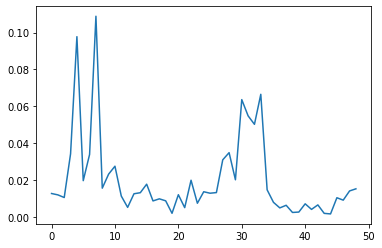

In [48]:
plt.plot(rf_model.feature_importances_)

# Results

In [53]:
print(f"SGD Mean Squared Error test: {round(np.mean(MSE_Test_SGD),2)} ± {round(np.std(MSE_Test_SGD),2)}")

print(f"RIDGE Mean Squared Error test: {round(np.mean(MSE_Test_RIDGE),2)} ± {round(np.std(MSE_Test_RIDGE),2)}")

print(f"BLR Mean Squared Error test: {round(np.mean(MSE_Test_BLR),2)} ± {round(np.std(MSE_Test_BLR),2)}")

print(f"GB Mean Squared Error test: {round(np.mean(MSE_Test_GB),2)} ± {round(np.std(MSE_Test_GB),2)}")

print(f"SVM Mean Squared Error test: {round(np.mean(MSE_Test_SVM),2)} ± {round(np.std(MSE_Test_SVM),2)}")

print(f"RF Mean Squared Error test: {round(np.mean(MSE_Test_RF),2)} ± {round(np.std(MSE_Test_RF),2)}")

print(f"MLP Mean Squared Error test: {round(np.mean(MSE_Test_MLP),2)} ± {round(np.std(MSE_Test_MLP),2)}")        

SGD Mean Squared Error test: 0.07 ± 0.01
RIDGE Mean Squared Error test: 0.06 ± 0.02
BLR Mean Squared Error test: 0.07 ± 0.02
GB Mean Squared Error test: 0.08 ± 0.04
SVM Mean Squared Error test: 0.09 ± 0.04
RF Mean Squared Error test: 0.08 ± 0.04
MLP Mean Squared Error test: 0.09 ± 0.04


In [ ]:
plt.scatter(y_test,y_pred_test)

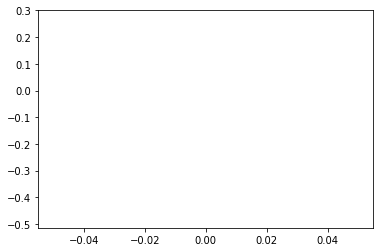

In [46]:
plt.plot(svm_model.coef_)
plt.show()

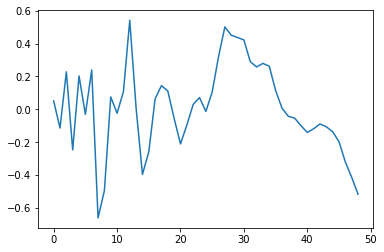

In [67]:
plt.plot(lin_reg.coef_)

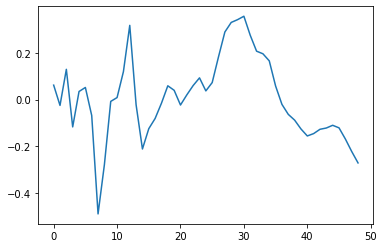

In [68]:
plt.plot(bayesian_model.coef_)

In [ ]:
plt.plot(bayesian_model.coef_)

In [ ]:
plt.plot(bayesian_model.coef_)

In [ ]:
plt.plot(lin_reg.coef_)

In [ ]:
print('T1 = 0.78s or 2.0s')

In [ ]:
print(dfhead_numpy[27])
print(dfhead_numpy[7])

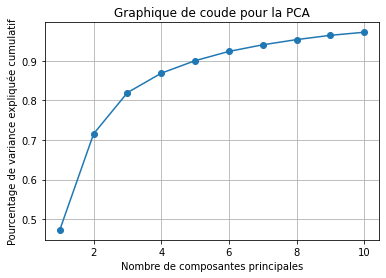

In [43]:
from sklearn.decomposition import PCA

# Générer des données factices
np.random.seed(42)
#X = df_numpy[:,1:-1] #All data
#X = df_numpy[:,-7:] #All "resume" features
#X = df_numpy[:,1:-7] #All Sa
#X = df_numpy[:,1:50] #First 50 Sa

#X = df_scaled_numpy[:,1:-1] #All data
#X = df_scaled_numpy[:,-7:] #All "resume" features
X = df_scaled_numpy[:,1:-7] #All Sa
#X = df_scaled_numpy[:,1:50] #First 50 Sa

y = df_numpy[:,-1] #Collapse capacity

# Effectuer la PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculer le pourcentage de variance expliquée cumulatif
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot du graphique de coude
plt.plot(range(1, len(cumulative_variance_ratio[0:10]) + 1), cumulative_variance_ratio[0:10], marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Pourcentage de variance expliquée cumulatif')
plt.title('Graphique de coude pour la PCA')
plt.grid(True)
plt.show()


In [ ]:
X_pca[0].shape

In [ ]:
max_iterations = 10
MSE_Train_SGD = np.zeros((1,max_iterations))
MSE_Test_SGD = np.zeros((1,max_iterations))
MSE_Train_LS = np.zeros((1,max_iterations))
MSE_Test_LS = np.zeros((1,max_iterations))
SEED = 42

for i in range(max_iterations):
    np.random.seed(SEED)
    X = X_pca[:,0:3]
    y = df_numpy[:,-1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

    sgd_reg = SGDRegressor(max_iter=10000000, tol=1e-3, learning_rate='adaptive', random_state=SEED)
    lin_reg = LinearRegression()

    sgd_reg.fit(X_train, y_train)
    lin_reg.fit(X_train, y_train)

    y_pred_train = sgd_reg.predict(X_train)
    y_pred_test = sgd_reg.predict(X_test)
    
    MSE_Train_SGD[0,i] = mean_squared_error(y_train, y_pred_train)
    MSE_Test_SGD[0,i] = mean_squared_error(y_test, y_pred_test)
    
    y_pred_train = lin_reg.predict(X_train)
    y_pred_test = lin_reg.predict(X_test)
    
    MSE_Train_LS[0,i] = mean_squared_error(y_train, y_pred_train)
    MSE_Test_LS[0,i] = mean_squared_error(y_test, y_pred_test)
    
    SEED = SEED + 1
    
    

print(f"SGD Mean Squared Error train: {np.mean(MSE_Train_SGD)} ± {np.std(MSE_Train_SGD)}")

print(f"SGD Mean Squared Error test: {np.mean(MSE_Test_SGD)} ± {np.std(MSE_Test_SGD)}")

print(f"LS Mean Squared Error train: {np.mean(MSE_Train_LS)} ± {np.std(MSE_Train_LS)}")

print(f"LS Mean Squared Error test: {np.mean(MSE_Test_LS)} ± {np.std(MSE_Test_LS)}")

In [ ]:
Get the natural period(s) of the building and give more importance to the Sa that are near Sa(T_natural) if we take into account the Sa

Too much feature -> remove the high Sa since low energy ?
